# Graph Analysis - Handson and use cases

###    Marketing Analytics 
Graphs can be used to figure out the most influential people in a Social Network. Advertisers and Marketers can estimate the biggest bang for the marketing buck by routing their message through the most influential people in a Social Network
###    Banking Transactions 
Graphs can be used to find unusual patterns helping in mitigating Fraudulent transactions. There have been examples where Terrorist activity has been detected by analyzing the flow of money across interconnected Banking networks
###    Supply Chain 
Graphs help in identifying optimum routes for your delivery trucks and in identifying locations for warehouses and delivery centres
###    Pharma 
Pharma companies can optimize the routes of the salesman using Graph theory. This helps in cutting costs and reducing the travel time for salesman
###    Telecom 
Telecom companies typically use Graphs (Voronoi diagrams) to understand the quantity and location of Cell towers to ensure maximum coverage


In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# !pip install python-louvain
# !pip3 install --upgrade networkx

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import networkx as nx


In [ ]:
# create a new empty graph
G = nx.Graph()

In [ ]:
# add some nodes in the graph G
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)

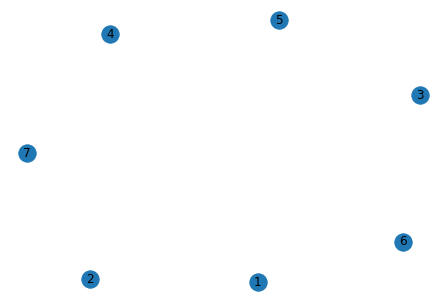

In [ ]:
nx.draw(G,with_labels=1) #with labels can be 0 or 1

In [ ]:
# list of all nodes added
print(G.nodes())

[1, 2, 3, 4, 5, 6, 7]


In [ ]:
# add edges between nodes
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(1, 6)
G.add_edge(1, 4)
G.add_edge(3, 5)
G.add_edge(4, 6)

In [ ]:
# list the edges
print(G.edges())

[(1, 2), (1, 6), (1, 4), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6)]


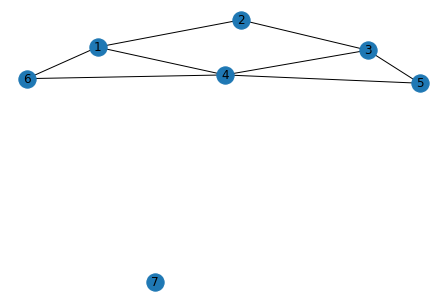

In [ ]:
# draw the graph G
nx.draw(G, with_labels=1)

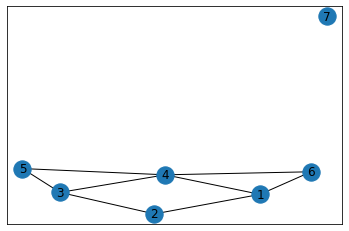

In [ ]:
nx.draw_networkx(G)

# Layouts 

In [ ]:
pos = nx.circular_layout(G)

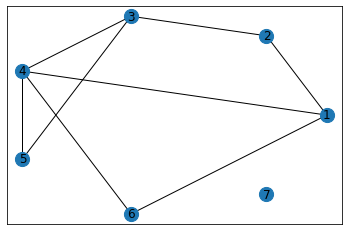

In [ ]:
nx.draw_networkx(G, pos = pos, with_labels = True, node_size = 200)

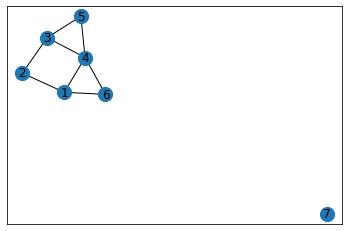

In [ ]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = pos, with_labels = True, node_size = 200)

In [ ]:
# Possible layouts :
#     "bipartite_layout",
#     "circular_layout",
#     "kamada_kawai_layout",
#     "random_layout",
#     "rescale_layout",
#     "rescale_layout_dict",
#     "shell_layout",
#     "spring_layout",
#     "spectral_layout",
#     "planar_layout",
#     "fruchterman_reingold_layout",
#     "spiral_layout",
#     "multipartite_layout",

# Cliques:
In the mathematical area of graph theory, a clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete.

In [ ]:
cliques = list(nx.find_cliques(G))

In [ ]:
cliques

[[2, 1], [2, 3], [4, 1, 6], [4, 3, 5], [7]]

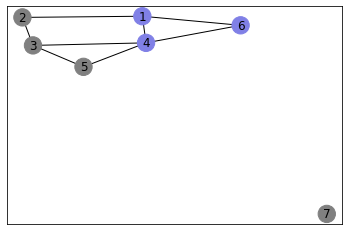

In [ ]:
max_clique = max(cliques, key=len)
node_color = [(0.5, 0.5, 0.5) for v in G.nodes()]
for i, v in enumerate(G.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G, node_color=node_color)

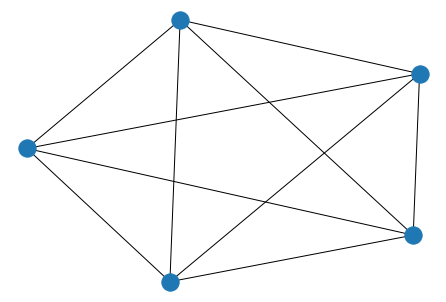

In [ ]:
CG = nx.complete_graph(5) #example of clique
nx.draw(CG)

In [ ]:
import community

In [ ]:
downloaded = drive.CreateFile({'id':"1upH-cTLby7DBhZv7F1obQP4TGd7pnIUI"})  
downloaded.GetContentFile('facebook_combined.txt') 

In [ ]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [4]:
# G_fb.nodes()

In [5]:
# G_fb.edges()

In [ ]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [ ]:
spring_pos = nx.spring_layout(G_fb)

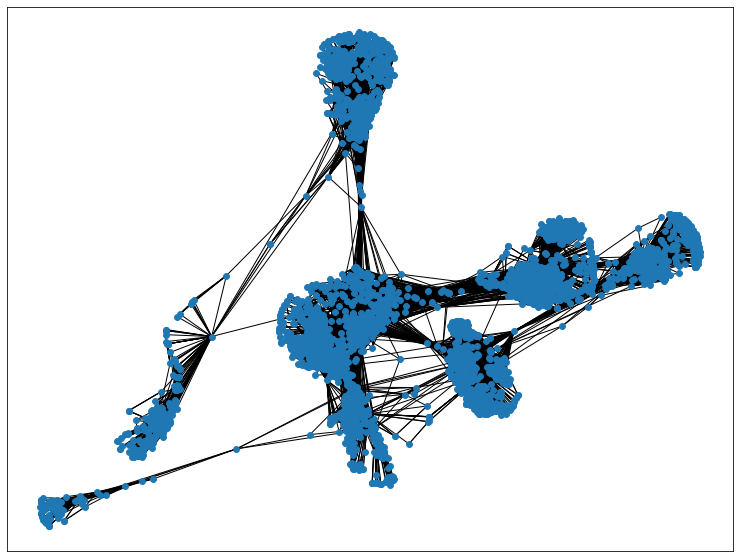

In [ ]:
plt.figure(figsize=(13,10))

nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 35)

# Centrality
In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease.

# Degree Centrality:
The number of links incident upon a node (i.e., the number of ties that a node has)

In [ ]:
dc = nx.degree_centrality(G_fb)
top = 10

max_nodes =  sorted(dc.items(), key = lambda v: -v[1])[:top]
dc_values = [5]*len(G_fb.nodes())
dc_colors = [0]*len(G_fb.nodes())
for node_deg in max_nodes:
    max_key=list(G_fb.nodes()).index(node_deg[0])
    dc_values[max_key] = 150
    dc_colors[max_key] = 2

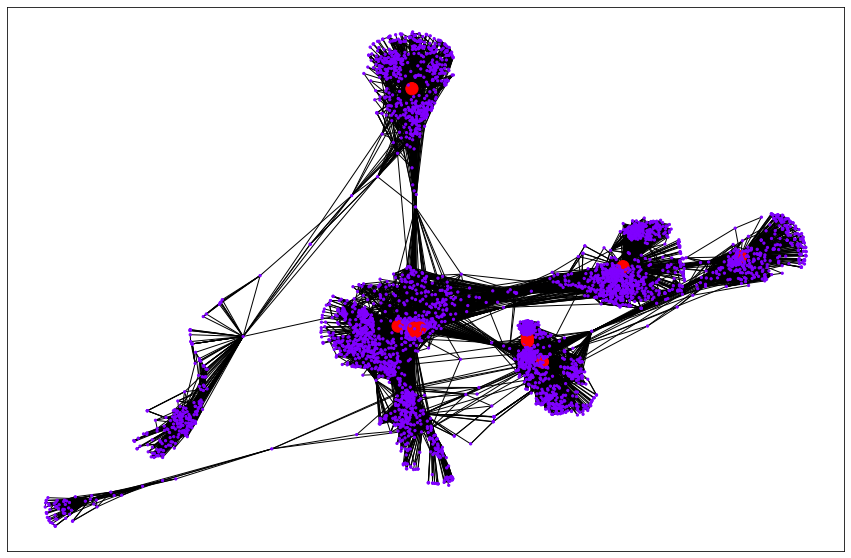

In [ ]:
plt.figure(figsize=(15,10))

nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = dc_colors, node_size = dc_values, with_labels = False)

# Betweenness centrality:
It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes

In [ ]:
bc = nx.betweenness_centrality(G_fb)
top = 10

max_nodes =  sorted(bc.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())
for node_deg in max_nodes:
    max_key=list(G_fb.nodes()).index(node_deg[0])
    bt_values[max_key] = 150
    bt_colors[max_key] = 2

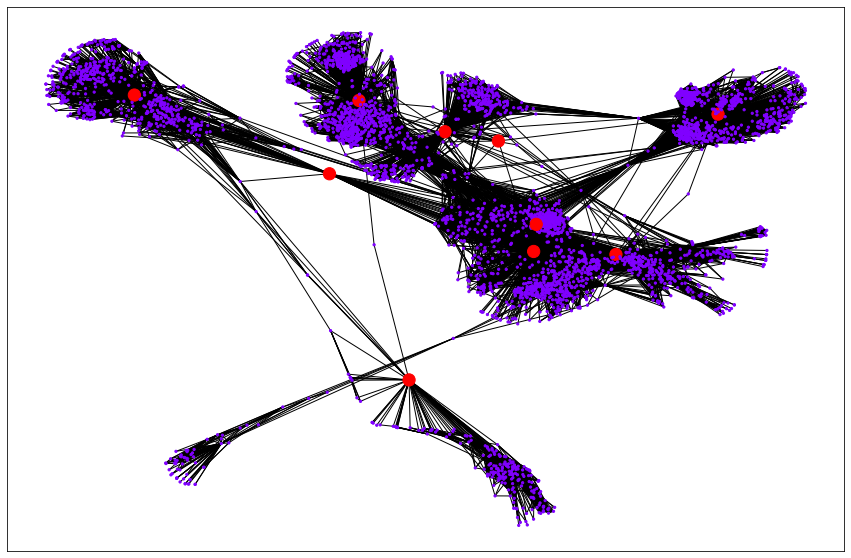

In [ ]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

# Community Detection:
In the study of complex networks, a network is said to have community structure if the nodes of the network can be easily grouped into sets of nodes such that each set of nodes is densely connected internally

In [ ]:
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

In [6]:
# parts

In [ ]:
pd.Series(values).value_counts()

4     554
7     548
2     446
1     432
3     423
0     350
5     323
9     237
13    226
12    206
6     117
8      73
11     60
10     25
14     19
dtype: int64

In [ ]:
print('number of communities:',len(pd.Series(values).value_counts()))

number of communities: 15


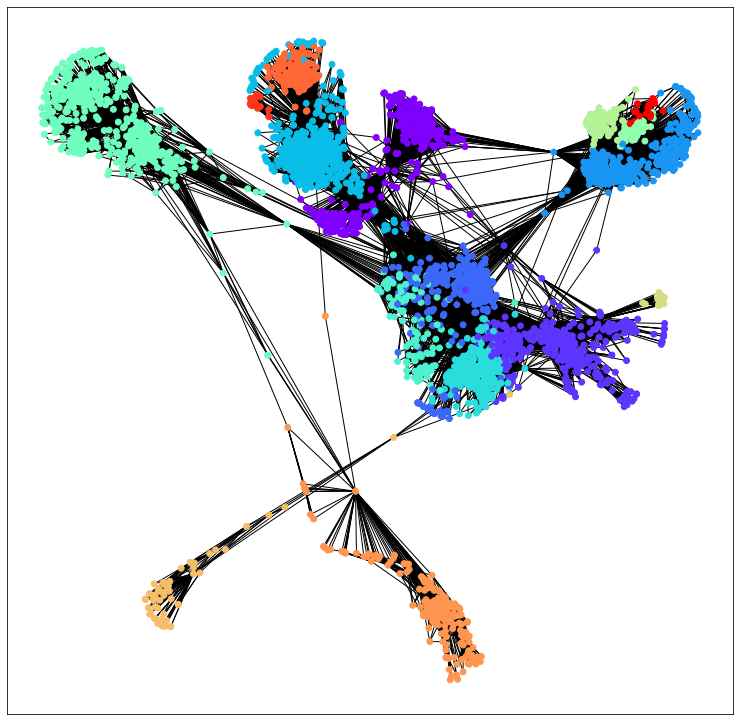

In [ ]:
plt.figure(figsize=(13,13))
nx.draw_networkx(G_fb, pos = spring_pos,  cmap = plt.get_cmap("rainbow"),node_color = values,
                 node_size = 35, with_labels = False)

# Graph Use Case: Analysing the graph of Network Scientists (Co-Authorship)
We now look at how metrics based on graph properties can be used to determine the Network Worth of Individuals using an example graph of network scientists. This data can be downloaded from https://github.com/gephi/gephi/wiki/Datasets along with many other graph data sets for you to explore 

In [ ]:
downloaded = drive.CreateFile({'id':"12ogjOXQmRl7K3Yia-23L0hQuiekut-Io"})  
downloaded.GetContentFile('netscience.gml') 

In [ ]:
mygraph = nx.read_gml("netscience.gml")

In [ ]:
print('Nodes:',len(mygraph.nodes()),'Edges: ',len(mygraph.edges()))

Nodes: 1589 Edges:  2742


In [ ]:
spring_pos = nx.spring_layout(mygraph)

In [7]:
# list(mygraph.edges())

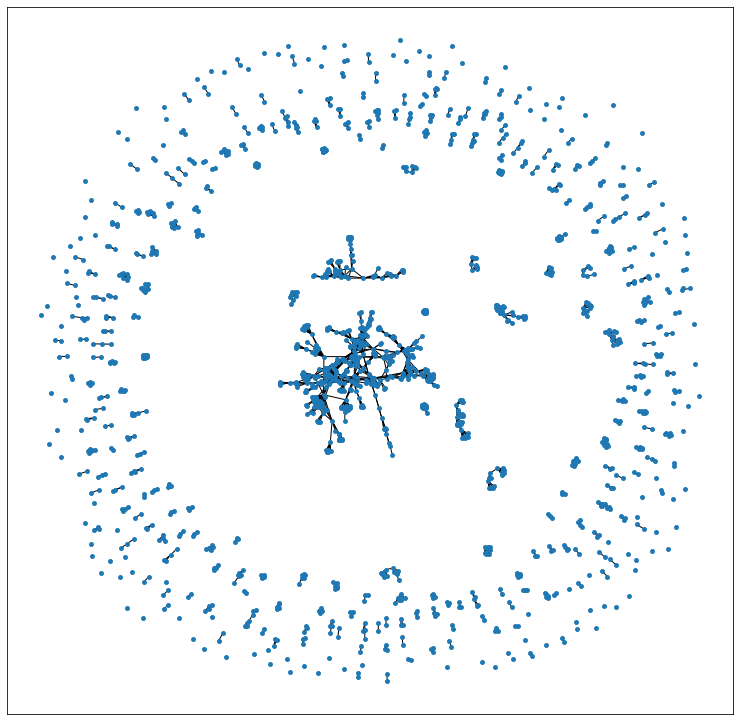

In [ ]:
plt.figure(figsize=(13,13))
nx.draw_networkx(mygraph, pos = spring_pos,cmap = plt.get_cmap("rainbow"), with_labels = False, node_size = 15)

In [ ]:
bc = nx.betweenness_centrality(mygraph)
top = 10

max_nodes =  sorted(bc.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(mygraph.nodes())
bt_colors = [0]*len(mygraph.nodes())
for node_deg in max_nodes:
    max_key=list(mygraph.nodes()).index(node_deg[0])
    bt_values[max_key] = 150
    bt_colors[max_key] = 2

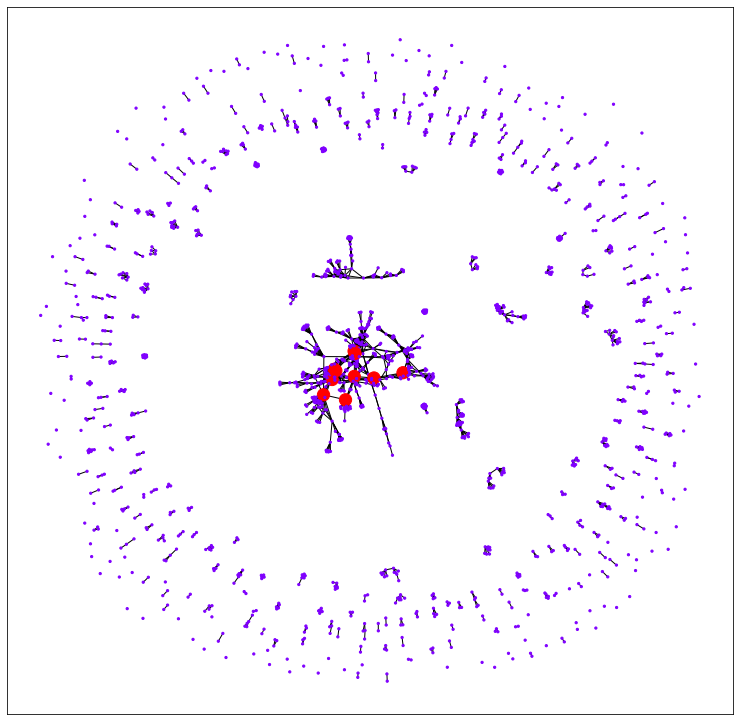

In [ ]:
plt.figure(figsize=(13,13))
nx.draw_networkx(mygraph, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

In [8]:
# list(mygraph.nodes())

In [ ]:
max_nodes #max between ness centrality

[('NEWMAN, M', 0.022459375113458798),
 ('PASTORSATORRAS, R', 0.019516861381626158),
 ('MORENO, Y', 0.01617343211214779),
 ('SOLE, R', 0.015276756135266724),
 ('BOCCALETTI, S', 0.014443550319900836),
 ('JEONG, H', 0.014172140544325236),
 ('HOLME, P', 0.013099217887592772),
 ('CALDARELLI, G', 0.012527805884243034),
 ('BIANCONI, G', 0.009888736450975174),
 ('CAPOCCI, A', 0.00987789056154081)]

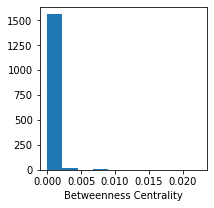

In [ ]:
bet_cent = list(nx.betweenness_centrality(mygraph).values())
plt.figure(figsize=(3,3))

plt.hist(bet_cent)
plt.xlabel("Betweenness Centrality")
plt.show()

In [ ]:
# bt

In [ ]:
dc = nx.degree_centrality(mygraph)
top = 10
mynodes = list(mygraph.nodes())
max_nodes =  sorted(dc.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(mygraph.nodes())
bt_colors = [0]*len(mygraph.nodes())
for node_deg in max_nodes:
    max_key=mynodes.index(node_deg[0])
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 


In [ ]:
max_nodes # top 10 degree centrality

[('BARABASI, A', 0.021410579345088162),
 ('JEONG, H', 0.017002518891687655),
 ('NEWMAN, M', 0.017002518891687655),
 ('OLTVAI, Z', 0.01322418136020151),
 ('YOUNG, M', 0.012594458438287152),
 ('UETZ, P', 0.012594458438287152),
 ('CAGNEY, G', 0.012594458438287152),
 ('MANSFIELD, T', 0.012594458438287152),
 ('ALON, U', 0.011964735516372796),
 ('BOCCALETTI, S', 0.011964735516372796)]

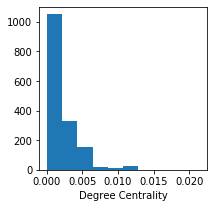

In [ ]:
plt.figure(figsize=(3,3))
deg_cent = list(nx.degree_centrality(mygraph).values())
plt.hist(deg_cent)
plt.xlabel("Degree Centrality")
plt.show()

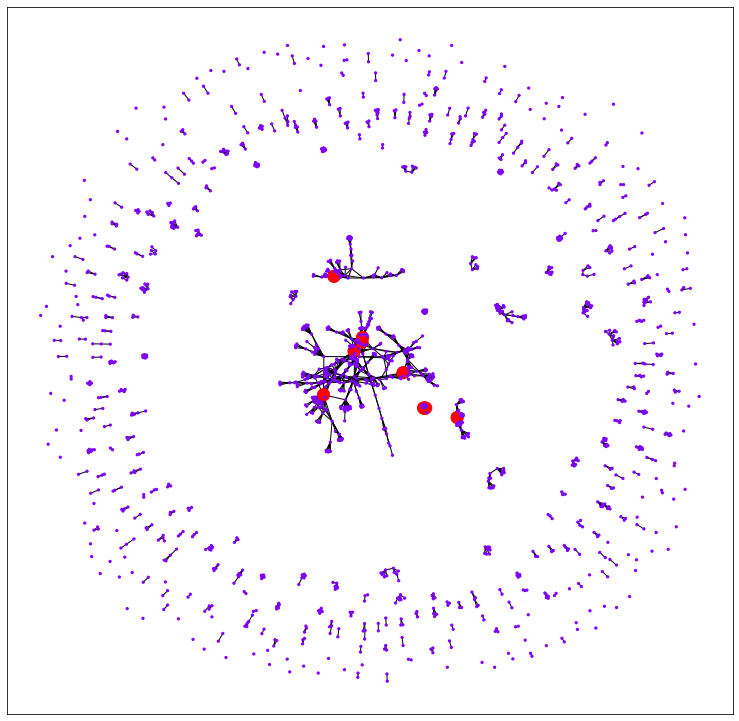

In [ ]:
plt.figure(figsize=(13,13))

nx.draw_networkx(mygraph, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

In [ ]:
# import community as community_louvain

In [ ]:
parts = community.best_partition(mygraph)
values = [parts.get(node) for node in mygraph.nodes()]

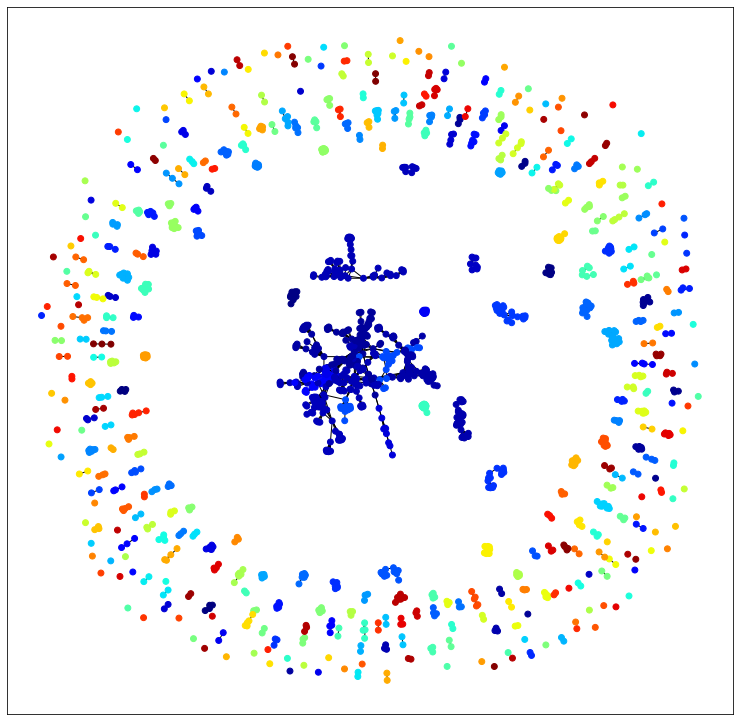

In [ ]:
plt.figure(figsize=(13,13))
nx.draw_networkx(mygraph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)

In [ ]:
# pd.Series(values).value_counts()

In [ ]:
print('number of communities:',len(pd.Series(values).value_counts()))

number of communities: 405


In [ ]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
prs = pagerank(mygraph)

In [9]:
# prs

In [10]:
# {k: v for k, v in sorted(prs.items(), key=lambda item: item[1], reverse=True)}

# Keyphrase Analysis

In [ ]:
from os import listdir
from os.path import isfile, join
def read_data(mypath):
    from collections import defaultdict 
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    d_cnt = defaultdict(int)
    data = []
    for f in onlyfiles:
        with open(mypath+f) as fptr:
            tags = []
            for line in fptr:
                newval = line.rstrip().lower()
                tags.append(newval)
                d_cnt[newval] = d_cnt[newval]+1
            data.append(tags)
            
    # remove tags that appear just once
    item_cnt =0
    final_set = set()
    for item,cnt in d_cnt.items():
        if cnt <= 1:
            item_cnt = item_cnt +1
        else:
            final_set.add(item)
            
    final_data = []
    for data_l in data:
        this_list=[]
        for item in data_l:
            if item in final_set:
                this_list.append(item)
        final_data.append(this_list)
        
    return final_data

In [ ]:
downloaded = drive.CreateFile({'id':"1xT-QQ6xihVnexBtqmmlD_1cv9Z8AXz4a"}) 


In [ ]:
downloaded

GoogleDriveFile({'id': '1xT-QQ6xihVnexBtqmmlD_1cv9Z8AXz4a'})

In [ ]:
mypath = "SemEval2010/keys/" #/tags data/"
data = read_data(mypath)
data = data[:30]

In [11]:
# data

In [ ]:
len(data)

30

In [ ]:
# Create Unique set of keyphrases
s = set()
for d in data[:30]:
    s=s.union(d)
len(s)

88

In [13]:
# Build Graph

# G = nx.Graph()
# G.add_nodes_from(s)
# G.nodes()

In [ ]:
#Count unique edges and their weights (co-occurance)
import itertools as it
from collections import defaultdict 
my_edges = defaultdict(int)
for d in data:
    for pair in it.product(d, repeat=2):
        if (pair[0] != pair[1]):
            my_edges[pair] += 1

In [ ]:
list(it.product(['a','b','c'],repeat=2))

[('a', 'a'),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'a'),
 ('b', 'b'),
 ('b', 'c'),
 ('c', 'a'),
 ('c', 'b'),
 ('c', 'c')]

In [14]:
# my_edges

In [ ]:
# Add edges
for e,w in my_edges.items():
    G.add_edge(*e)
    G.edges[e]['weight']=w

In [15]:
# G.edges()

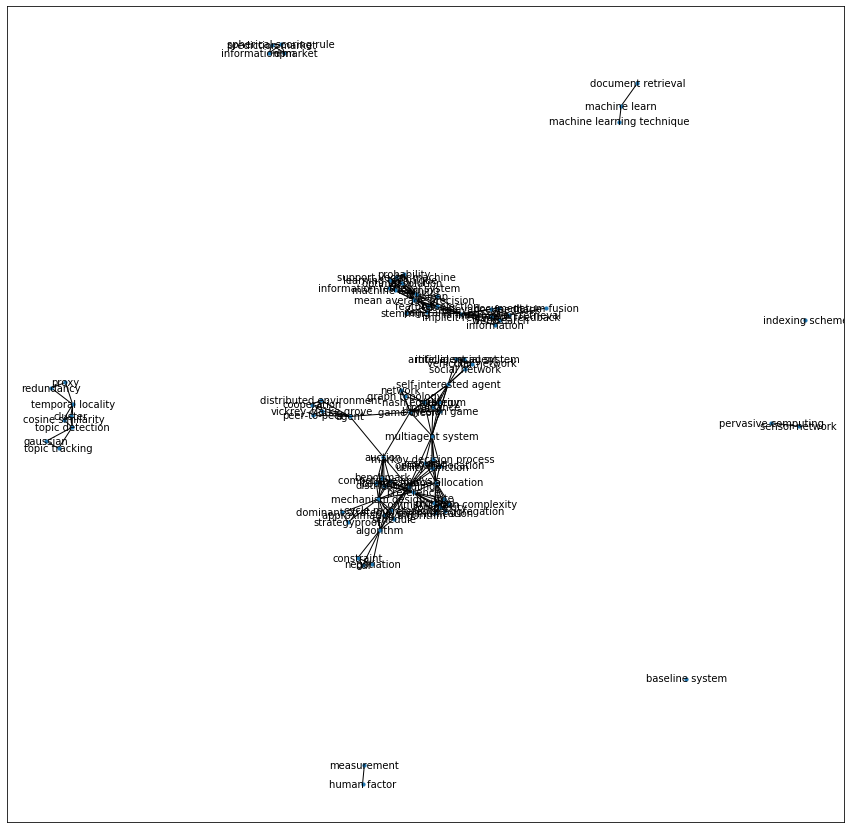

In [ ]:
plt.figure(figsize=(15,15))
nx.draw_networkx(G,with_labels=True,node_size=10,font_size=10)


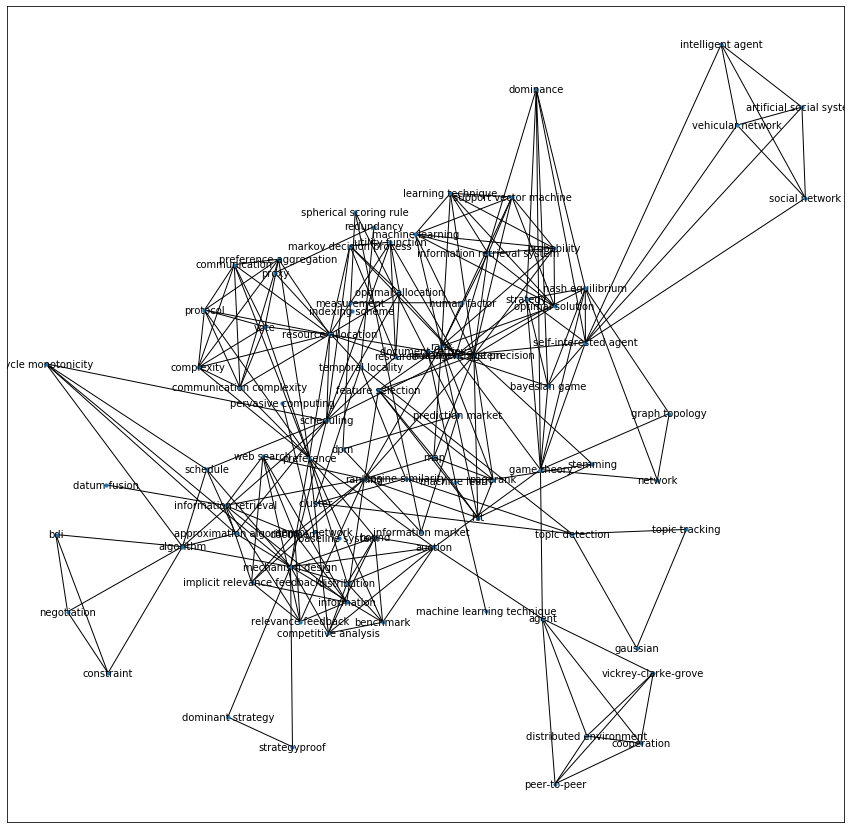

In [ ]:
pos=nx.kamada_kawai_layout(G)
plt.figure(figsize=(15,15))
nx.draw_networkx(G,with_labels=True,node_size=10,font_size=10,pos=pos)


In [16]:
# Page Rank for identifying most important keyphrases
# from networkx.algorithms.link_analysis.pagerank_alg import pagerank
# prs = pagerank(G)
# {k: v for k, v in sorted(prs.items(), key=lambda item: item[1], reverse=True)}

# Quick discussion about using Knowledge graphs to improve search results and enrichment of data